In [25]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt


url = 'http://www.aikustore.com:8080/mjsys/wemall/WemallGoodsAction!list'
r = requests.get(url)
parsed = r.json()
# print(parsed)
text = json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False)
# print(text)


df = pd.DataFrame.from_dict(parsed['rows'])
print(df['goods_name'].head())


0    I’m David16专柜新品爱大卫韩版春季男装长袖休闲外套DQJP11C1
1                       秋冬新款男装 冲锋衣羽绒服 中长厚外套
2           春季长袖T恤男士宽松加大码上衣青年男装t恤韩版假两件衬衫领体恤
3     马克华菲长袖衬衫 2015秋装新款男士修身韩版拼接衬衣7153307221
4                    法兰绒休闲格子衬衫男长袖免烫磨毛男士格子衬衣
Name: goods_name, dtype: object


       goods_name  goods_salenum
189   【包邮】时尚牛仔直筒裤           1636
188   【包邮】破洞九分小脚裤           1599
187   【包邮】九分破洞牛仔裤           1595
185  【包邮】高腰开叉喇叭长裤           1577
191   【包邮】破洞渔网牛仔裤           1562
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


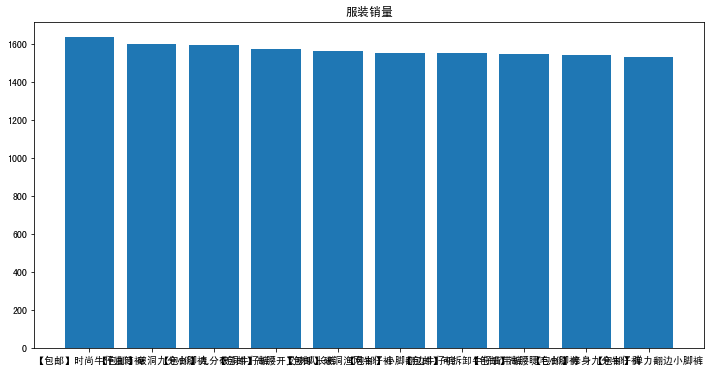

In [56]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
fig_1 = plt.figure(figsize=(12, 6))
plt.title('服装销量')
data = df[['goods_name', 'goods_salenum']]
data = data.sort_values(by = ['goods_salenum'], ascending=False)
print(data.head())
x = data['goods_name'][:10]
# print(index.head())
# print(type(data))
y = data['goods_salenum'][:10]
print(type(x))
print(type(y))

plt.bar(range(10), y, tick_label=x)
# plt.bar(range(10), data['goods_salesnum'][:10], tick_label=index, color='gray')
plt.show()